__Bring data from some random years and from random disciplines and see that the trend does not exist there__

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import operator

import peakutils

import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import operator
from collections import Counter

import scipy.stats
from scipy.optimize import curve_fit
from scipy.misc import factorial

import pickle
from sklearn.feature_extraction.text import CountVectorizer

from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson, Logit
from scipy.stats import binom, nbinom

import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/word-journey-data.pql"
data_ = pd.read_pickle(filename)

In [4]:
d1 = "Biochemistry & Molecular Biology"
d2 = "Pharmacology & Pharmacy"
d3 = "Mathematics"

In [5]:
inp1 = data_[data_.Label == d1]
inp2 = data_[data_.Label == d2]
inp3 = data_[data_.Label == d3]

In [6]:
v1 = CountVectorizer()
vw1 = v1.fit_transform(inp1.title_words)

v2 = CountVectorizer()
vw2 = v2.fit_transform(inp2.title_words)

v3 = CountVectorizer()
vw3 = v3.fit_transform(inp3.title_words)

In [9]:
cm1 = vw1.toarray()

unqs1 = []
cnts1 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs1.append(unique_)
    cnts1.append(counts_)

In [12]:
yearly_word_frequency_variations1 = []
avg_variations_for_freq1 = []

for index in tqdm(range(0, cm1.shape[0] - 1, 10)):
    
    # take two consecutive years
    tmp_ = cm1[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations1.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq1.append(yearly_avg_variations_for_freq)



  0%|          | 0/12 [00:00<?, ?it/s]

 50%|█████     | 6/12 [00:00<00:00, 53.99it/s]

 67%|██████▋   | 8/12 [00:00<00:00, 34.36it/s]

 83%|████████▎ | 10/12 [00:00<00:00, 18.83it/s]

100%|██████████| 12/12 [00:00<00:00, 12.82it/s]



In [14]:
avg_variations_for_freq1

12

1022 words with 5 counts


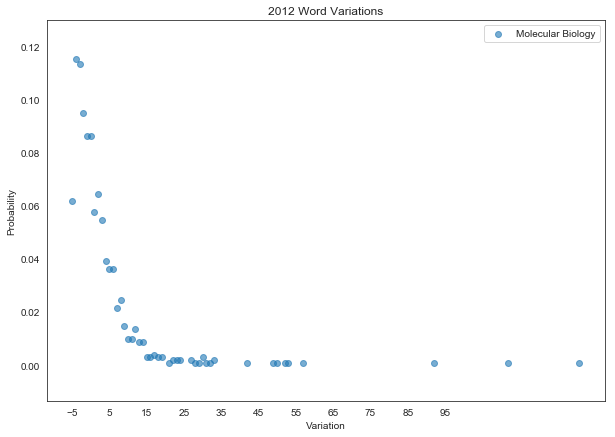

In [21]:
K = 5
f = plt.figure(figsize=(10,7))


year = 2012
N = 100

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+10:N+12,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()] 


ax = f.add_subplot(111)
ax.scatter(X1, Y1, alpha=0.6, label="Molecular Biology")
ax.set_xticks(range(-5, 100, 10))
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + " Word Variations")
ax.legend()